In [ ]:
#logistic regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets\final_dataset.csv')
print(data.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.748   0.627    7    -6.029     1       0.0639   
2       3         0.509   0.803    0    -6.743     1       0.0400   
3       2         0.703   0.226    7   -13.457     1       0.0403   
4       2         0.472   0.349    1    -7.340     1       0.0346   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.131          0.000000    0.0852    0.524  120.963       188491   
2         0.684          0.000539    0.4630    0.651  166.018       187119   
3         0.889          0.028400    0.0652    0.117  118.945       226387   
4         0.143          0.000063    0.0930    0.136  121.054       187000   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


In [3]:
feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 
                   'tempo', 'duration_ms', 'time_signature']


df = pd.DataFrame(data, columns=feature_names)
df['region'] = data.region
df['popular'] = data.popular
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,region,popular
0,0.685,0.644,10,-13.206,0,0.1550,0.30200,0.000055,0.1140,0.8080,164.919,169379,4,3,0
1,0.748,0.627,7,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,188491,4,3,0
2,0.509,0.803,0,-6.743,1,0.0400,0.68400,0.000539,0.4630,0.6510,166.018,187119,4,3,0
3,0.703,0.226,7,-13.457,1,0.0403,0.88900,0.028400,0.0652,0.1170,118.945,226387,4,2,0
4,0.472,0.349,1,-7.340,1,0.0346,0.14300,0.000063,0.0930,0.1360,121.054,187000,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189292,0.637,0.741,9,-4.364,1,0.0300,0.20000,0.000000,0.1850,0.4190,89.982,241564,4,6,0
189293,0.674,0.590,6,-7.947,0,0.0325,0.60200,0.002100,0.1940,0.3960,133.953,218500,4,8,0
189294,0.819,0.679,11,-8.984,0,0.1040,0.35300,0.000000,0.2910,0.5510,139.983,208608,4,4,0
189295,0.689,0.743,11,-8.559,0,0.4980,0.09250,0.000000,0.0511,0.3490,141.728,207667,4,10,0


In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In [5]:
#seperate audio features and popular column. Column will be used as a target value
X = data.drop(['popular'], axis=1)  # Features
y = data['popular']  # Target

In [6]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model with scaled data
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [8]:
#make predictions
y_pred = model.predict(X_test)

In [9]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Adjust threshold (e.g., 0.3 instead of 0.5)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


In [10]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[    0 31312]
 [    0  6548]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     31312
           1       0.17      1.00      0.29      6548

    accuracy                           0.17     37860
   macro avg       0.09      0.50      0.15     37860
weighted avg       0.03      0.17      0.05     37860


Accuracy: 0.17


c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"\nAccuracy: {accuracy:.2f}")


Confusion Matrix:
[[   57 31255]
 [    5  6543]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.00      0.00     31312
           1       0.17      1.00      0.30      6548

    accuracy                           0.17     37860
   macro avg       0.55      0.50      0.15     37860
weighted avg       0.79      0.17      0.05     37860


Accuracy: 0.17


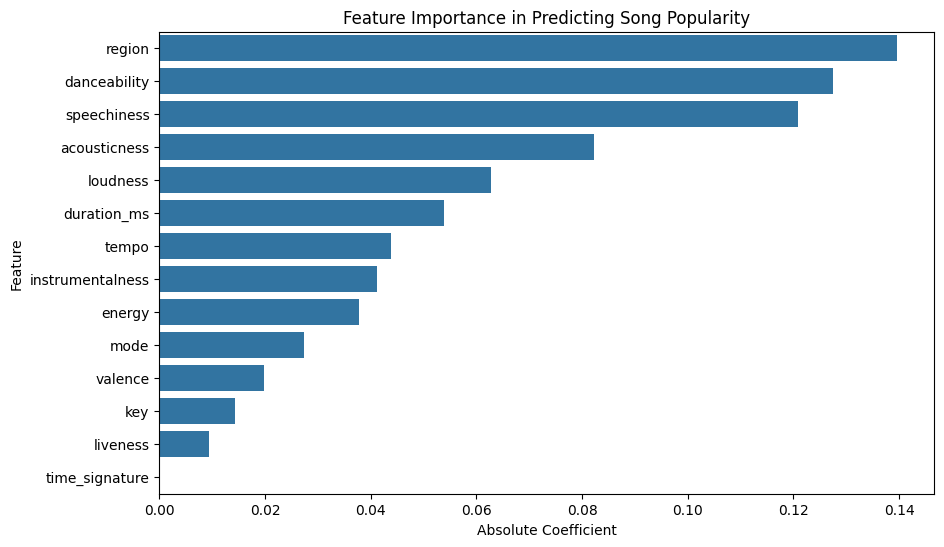

In [12]:
# Get the coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Song Popularity')
plt.show()

In [13]:
# Add predictions to the original dataset
data['Predicted Popularity'] = model.predict(X)

# Group by region and analyze the mean of each audio feature
region_analysis = data.groupby('region').mean()

print(region_analysis)

        danceability    energy       key  loudness      mode  speechiness  \
region                                                                      
0           0.695380  0.620466  5.250545 -8.462242  0.452727     0.135433   
1           0.586429  0.623724  5.326420 -7.046929  0.705991     0.072313   
2           0.666135  0.638871  5.304252 -7.663443  0.522622     0.138799   
3           0.665140  0.660665  5.377459 -6.762027  0.590723     0.106570   
4           0.630585  0.601864  5.359108 -8.404345  0.346573     0.098354   
5           0.657257  0.617486  5.198578 -7.201029  0.605655     0.145984   
6           0.637644  0.635071  5.364140 -7.599609  0.549208     0.106327   
7           0.644010  0.628566  5.251293 -7.210963  0.604340     0.119958   
8           0.616361  0.562751  5.279662 -7.784699  0.675477     0.074066   
9           0.649361  0.646063  5.331664 -7.301545  0.538852     0.134282   
10          0.675094  0.642254  5.375579 -7.454096  0.505173     0.155228   

In [14]:
# Assuming you have your scaler and model already trained

# Example new song features
new_song_data = {
    'region':9,
    'danceability': 0.7,
    'energy': 0.8,
    'key': 5,               
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.6,
    'tempo': 120,
    'duration_ms': 200000,
    'time_signature': 4
}

# Create a DataFrame
new_song_df = pd.DataFrame([new_song_data])

# Scale the new song data
new_song_scaled = scaler.transform(new_song_df)

# Make prediction
predicted_popularity = model.predict(new_song_scaled)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be not popular.


c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
